<a href="https://colab.research.google.com/github/AronAhn/tf_udemy/blob/master/A_neural_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
!pip install tensorflow-gpu==2.0.0-rc1
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

     |████████████████████████████████| 380.5MB 42kB/s 
     |████████████████████████████████| 4.3MB 29.9MB/s 
     |████████████████████████████████| 501kB 10.1MB/s 


In [0]:
import numpy as np

### Graphs

In [0]:
np.random.seed(101)
tf.compat.v1.set_random_seed(101)

In [0]:
rand_a = np.random.uniform(0, 100, (5,5))
rand_b = np.random.uniform(0, 100, (5,1))

In [0]:
a = tf.compat.v1.placeholder(tf.float32)
b = tf.compat.v1.placeholder(tf.float32)
add_op = a + b
mul_op = a * b

In [6]:
with tf.compat.v1.Session() as sess:
  add_result = sess.run(add_op, feed_dict={a:10, b:20})
  print(add_result)

30.0


In [7]:
with tf.compat.v1.Session() as sess:
  add_result = sess.run(add_op, feed_dict={a:rand_a, b:rand_b})
  print(add_result)
  
  mult_result = sess.run(mul_op, feed_dict={a:rand_a, b:rand_b})
  print(mult_result)

[[151.07166  156.49855  102.27921  116.58396  167.95949 ]
 [135.45622   82.76316  141.42784  124.22093   71.06043 ]
 [113.30171   93.09215   76.06819  136.43912  154.42728 ]
 [ 96.71727   81.83804  133.83675  146.38118  101.10579 ]
 [122.72681  105.982925  59.044632  67.9831    72.89292 ]]
[[5134.644   5674.25     283.12433 1705.4707  6813.8315 ]
 [4341.8125  1598.267   4652.734   3756.8293   988.94635]
 [3207.8113  2038.1029  1052.7742  4546.9805  5588.1157 ]
 [1707.379    614.02527 4434.989   5356.7773  2029.8555 ]
 [3714.0984  2806.6438   262.76764  747.19855 1013.292  ]]


### Neural Network

In [0]:
n_features = 10
n_dense_neurons = 3

In [9]:
x = tf.compat.v1.placeholder(tf.float32, (None, n_features))
W = tf.compat.v1.Variable(tf.random.normal([n_features, n_dense_neurons]))
b = tf.compat.v1.Variable(tf.ones([n_dense_neurons]))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
xW = tf.matmul(x, W)
z = tf.add(xW, b)
a = tf.sigmoid(z)

In [0]:
init = tf.compat.v1.global_variables_initializer()

In [0]:
with tf.compat.v1.Session() as sess:
  sess.run(init)
  layer_out = sess.run(a, feed_dict={x:np.random.random([1, n_features])})

In [13]:
print(layer_out)

[[0.19592889 0.8423014  0.36188066]]


### Simple regression example

In [0]:
x_data = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10)
y_label = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10)

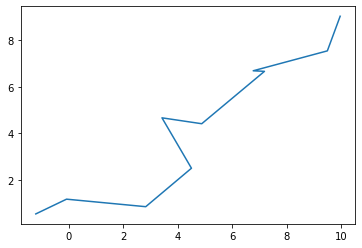

In [15]:
import matplotlib.pyplot as plt
plt.plot(x_data, y_label)

In [0]:
m = tf.compat.v1.Variable(0.44)
b = tf.compat.v1.Variable(0.87)

In [0]:
error = 0
for x, y in zip(x_data, y_label):
  y_hat = m*x + b
  error += (y-y_hat)**2

In [18]:
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)
init = tf.compat.v1.global_variables_initializer()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
with tf.compat.v1.Session() as sess:
  sess.run(init)
  training_steps = 1
  
  for i in range(training_steps):
    sess.run(train)

  final_slope, final_intercept = sess.run([m, b])

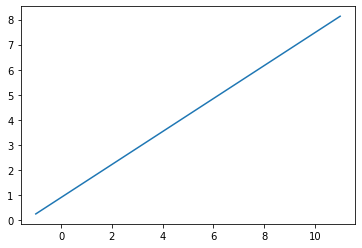

In [20]:
x_test = np.linspace(-1, 11, 10)
y_pred_plot = final_slope*x_test + final_intercept
plt.plot(x_test, y_pred_plot)

### another regression example

In [0]:
x_data = np.linspace(0.0, 10.0, 1000000)
noise = np.random.randn(len(x_data))

y = mx + b
b = 5


In [0]:
import pandas as pd
y_true = (0.5 * x_data) + 5 + noise
x_df = pd.DataFrame(data=x_data, columns=['X data'])
y_df = pd.DataFrame(data=y_true, columns=['y'])
my_data = pd.concat([x_df, y_df], axis=1)

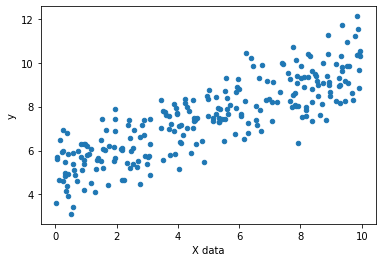

In [23]:
my_data.sample(n=250).plot(kind='scatter', x='X data', y='y')

In [0]:
batch_size = 8
m = tf.Variable(0.81)
b = tf.Variable(0.17)

xph = tf.compat.v1.placeholder(tf.float32, [batch_size])
yph = tf.compat.v1.placeholder(tf.float32, [batch_size])
y_model = m*xph + b
error = tf.reduce_sum(tf.square(yph-y_model))

In [0]:
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)
init = tf.compat.v1.global_variables_initializer()

In [0]:
with tf.compat.v1.Session() as sess:
  sess.run(init)
  batches = 1000
  for i in range(batches):
    rand_ind = np.random.randint(len(x_data), size=batch_size)
    feed = {xph:x_data[rand_ind], yph:y_true[rand_ind]}
    sess.run(train, feed_dict=feed)
  model_m, model_b = sess.run([m, b])

In [27]:
print(model_m, model_b)

0.46632025 4.956627


In [0]:
y_hat = x_data*model_m + model_b

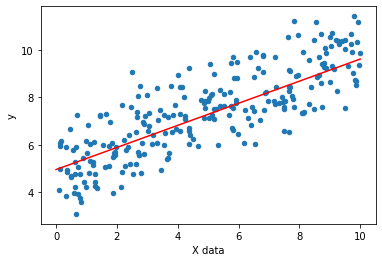

In [29]:
my_data.sample(250).plot(kind='scatter', x='X data', y="y")
plt.plot(x_data, y_hat, 'r')

TF test

In [0]:
feat_cols = [ tf.feature_column.numeric_column('x', shape=[1]) ]

In [31]:
estimator = tf.estimator.LinearRegressor(feature_columns = feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpeqmkz68n', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7ff8c5d8e160>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [0]:
from sklearn.model_selection import train_test_split
x_train, x_eval, y_train, y_eval = train_test_split(x_data, y_true, test_size=0.3, 
                                                    random_state=101)

In [0]:
input_func = tf.compat.v1.estimator.inputs.numpy_input_fn(
    {'x':x_train}, y_train, batch_size, num_epochs=None, shuffle=True)
train_input_func = tf.compat.v1.estimator.inputs.numpy_input_fn(
    {'x':x_train}, y_train, batch_size, num_epochs=1000, shuffle=False)
eval_input_func = tf.compat.v1.estimator.inputs.numpy_input_fn(
    {'x':x_eval}, y_eval, batch_size, num_epochs=1000, shuffle=False)


In [34]:
estimator.train(input_func, steps=1000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Use `tf.cast` instead.
Instructions for updating:
Call in

In [35]:
train_metrics = estimator.evaluate(input_fn=train_input_func, steps=1000)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-11-01T03:30:38Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpeqmkz68n/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [

In [36]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func, steps=1000)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-11-01T03:30:40Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpeqmkz68n/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [

In [37]:
print('TRAINING DATA METRICS')
print(train_metrics)

TRAINING DATA METRICS
{'average_loss': 1.0742393, 'label/mean': 7.49014, 'loss': 1.0742393, 'prediction/mean': 7.3734365, 'global_step': 1000}


In [38]:
print("EVAL METRICS")
print(eval_metrics)

EVAL METRICS
{'average_loss': 1.0711559, 'label/mean': 7.4638014, 'loss': 1.0711559, 'prediction/mean': 7.352451, 'global_step': 1000}


In [0]:
brand_new_data = np.linspace(0, 10, 10)
input_fn_predict = tf.compat.v1.estimator.inputs.numpy_input_fn({'x':brand_new_data}, shuffle=False)

In [40]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpeqmkz68n/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.4690027], dtype=float32)},
 {'predictions': array([5.114141], dtype=float32)},
 {'predictions': array([5.7592797], dtype=float32)},
 {'predictions': array([6.404418], dtype=float32)},
 {'predictions': array([7.0495567], dtype=float32)},
 {'predictions': array([7.6946945], dtype=float32)},
 {'predictions': array([8.339833], dtype=float32)},
 {'predictions': array([8.984972], dtype=float32)},
 {'predictions': array([9.63011], dtype=float32)},
 {'predictions': array([10.275249], dtype=float32)}]

In [41]:
predictions = []
for pred in estimator.predict(input_fn=input_fn_predict):
  predictions.append(pred['predictions'])

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpeqmkz68n/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[]

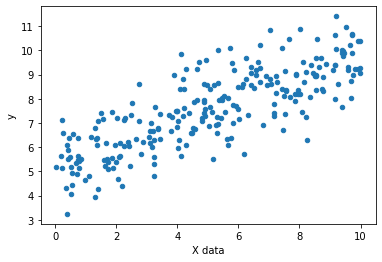

In [42]:
my_data.sample(n=250).plot(kind='scatter', x='X data', y='y')
plt.plot()

### classification

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
diabetes = pd.read_csv("/content/drive/My Drive/udemy_tf/FULL-TENSORFLOW-NOTES-AND-DATA/02-TensorFlow-Basics/pima-indians-diabetes.csv")

In [45]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [0]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
                'Insulin', 'BMI', 'Pedigree']

In [0]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: x - x.min() / (x.max() - x.min()))

In [48]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [0]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [0]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list(
    'Group', ['A', 'B', 'C' 'D'])
# assigned_group = tf.feature_column.categorical_column_with_hash_bucket(
#     'Group', hash_bucket_size=10)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

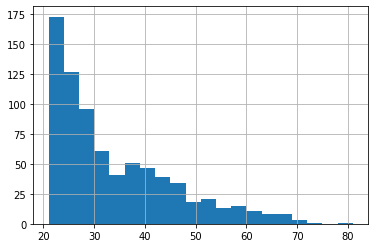

In [53]:
diabetes['Age'].hist(bins=20)

In [0]:
age_bucket = tf.feature_column.bucketized_column(age, boundaries=[20, 30, 40, 50, 60, 70])

In [0]:
feat_cols = [num_preg, plasma_gluc, dias_press, tricep, insulin, bmi, diabetes_pedigree, assigned_group, age_bucket]


### TRAIN TEST SPLIT

In [0]:
x_data = diabetes.drop('Class', axis=1)
labels = diabetes['Class']

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, labels, test_size=.3, random_state=101)

In [0]:
input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(
    x=X_train, y=y_train, batch_size=10, num_epochs=1000, shuffle=True
)

In [65]:
model = tf.compat.v1.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp5ylv3ohm', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7ff8bca53400>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [66]:
model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp5ylv3ohm/model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 0
INFO:tensorflow:global_step/sec: 188.736
INFO:tensorflow:loss = 7.6217294, step = 100 (0.537 sec)
INFO:tensorflow:global_step/sec: 240.96
INFO:tensorflow:

In [0]:
eval_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(
    x=X_test, y=y_test, batch_size=10, num_epochs=1, shuffle=False
)

In [70]:
result = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-11-01T04:18:30Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp5ylv3ohm/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-11-01-04:18:31
INFO:tensorflow:Saving dict for global step

In [72]:
result

{'accuracy': 0.73593074,
 'accuracy_baseline': 0.64935064,
 'auc': 0.7945679,
 'auc_precision_recall': 0.6377018,
 'average_loss': 0.53254104,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.125707,
 'precision': 0.6351351,
 'prediction/mean': 0.38397023,
 'recall': 0.5802469}

In [0]:
pred_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(
    x=X_test, batch_size=10, num_epochs=1, shuffle=False)

In [0]:
predictions = model.predict(pred_input_func)

In [77]:
my_pred = list(predictions)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp5ylv3ohm/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [0]:
my_pred

In [79]:
dnn_model = tf.estimator.DNNClassifier(hidden_units = [10,10,10], feature_columns=feat_cols,
                                       n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp182kt31z', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7ff8bb00e518>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [0]:
embedded_group_col = tf.feature_column.embedding_column(assigned_group, dimension=4)
feat_cols = [num_preg, plasma_gluc, dias_press, tricep, insulin, bmi, diabetes_pedigree, embedded_group_col, age_bucket]

In [85]:
input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(
    X_train, y_train, batch_size=10, num_epochs=1000, shuffle=True)
dnn_model = tf.compat.v1.estimator.DNNClassifier(hidden_units=[10,10,10], feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmplj2tg2qb', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7ff8b9ec7cf8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [86]:
dnn_model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmplj2tg2qb/model.ckpt.
INFO:tensorflow:loss = 7.4388566, step = 0
INFO:tensorflow:global_step/s

In [0]:
eval_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(
    x=X_test, y=y_test, batch_size=10, num_epochs=1, shuffle=False
)

In [89]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-11-01T04:32:32Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmplj2tg2qb/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-11-01-04:32:34
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.72727275, accuracy_baseline = 0.64935064, auc = 0.7934156,

{'accuracy': 0.72727275,
 'accuracy_baseline': 0.64935064,
 'auc': 0.7934156,
 'auc_precision_recall': 0.6617691,
 'average_loss': 0.5155096,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 4.96178,
 'precision': 0.60465115,
 'prediction/mean': 0.37644732,
 'recall': 0.6419753}